# Image Understanding Project

Image understanding (IU) focuses on the basis of image analysis in combination with artificial intelligence to further study the nature of image objects and their interconnections, understand the meaning of image content, and interpret the corresponding objective scenarios to guide and plan further actions. [<sup>1</sup>](#fn1)

Through this notebook we will see how to develop a basic IU project.

## Define an Objective for your Project

The most important step to any project is to establish a clear objective to achieve. Your objective may vary widely based on your specific use case. It will determine the type and quantity of data required for an image dataset. Remember that the purpose of our IU project is to create data-driven system or better said image-driven system. Here are some common IU objectives:

![Image of IU objectives](images/project_01.jpg)

- **Classification**:  Its goal is to use the raw visual data contained within an image to assign a certain conceptual label, or “class” to that image. 
- **Detection**: It is the process consisting at finding specific objects and localizing them to a certain area within an image. If you care where in an image the object is found, this is your objective.
- **Segmentation**: It is an advanced form of detection that occurs at pixel-level. Its purpose is to segment objects in an image according to their exact boundaries and separate them from each other.

For this project, since it is the "easiest" we are going to focus on and image classification project.

## Project data

Collecting and organizing a high-quality image data set is a critical step our project. This step can make or break a fledgling system. We are going to use machine learning (ML) models to classiffy our images,  but remember that ML model can produce exceptional insight, but only when they are fueled by high-quality, well-labeled, relevant data that accurately encapsulates the problem space.

In the case of data-driven projects, as ours, it is important to remember this motto: **garbage in = garbage out**.

Some desirable aspects that our dataset should have are: 
- Quantity: the dataset have a sufficient volume of images.
- Diversity: dataset's images come from a diverse set of perspectives, colors, or orientations.
- Accuracy: the dataset have relevant images and accurate labels.
- Quality: the right images in high-quality resolution are in the dataset.

Data can be collected, you can take all pictures or scrap them from internet but this is a time-demanding process, that generally implies to annotate all pictures (i.e., providing a label/class to each image). Even it can be created artificially, using novel techniques such as [GANs](https://papers.nips.cc/paper/2014/file/5ca3e9b122f61f8f06494c97b1afccf3-Paper.pdf), but this is beyond the scope of this course. However most of the time you have to deal with a dataset created by others. This will be our case.

In [1]:
# Libraries for use in a conda environment with comments on how to install them

import numpy as np # conda install numpy -y
import pandas as pd # conda install pandas -y
import matplotlib.pyplot as plt # conda install matplotlib -y
from skimage.io import imread # conda install scikit-image -y
import umap # conda install -c conda-forge umap-learn  -y
import umap.plot # conda install datashader bokeh holoviews colorcet -y
import os
import glob


from sklearn.model_selection import train_test_split

# For SVM model
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
from joblib import dump, load

### Data exploration

An important step when dealing with an unfamiliar dataset is to understanding it. This implies to visualize it, find outliers, and know the characteristics of the image. 

In [2]:
# Loading the dataset

data_path = './cats_not_cats/'

df = pd.read_csv(data_path + 'cats_not_cats.csv')
display(df.head())

,image,label,set
0,im_00001.jpg,0,train
1,im_00002.jpg,0,train
2,im_00003.jpg,1,train
3,im_00004.jpg,0,train
4,im_00005.jpg,0,train


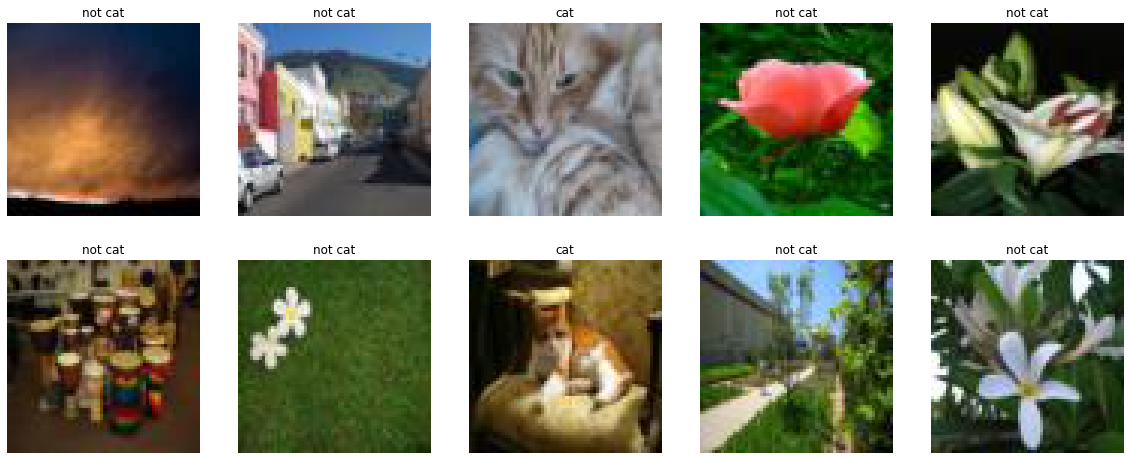

In [3]:
# visualizing 10 first images and its classes
labels = ['not cat', 'cat']

fig = plt.figure(figsize=(20, 8))
for i in range(10):
    filename, label = df.loc[i].image, df.loc[i].label
    im = imread(os.path.join(data_path, filename))
    ax = fig.add_subplot(2, 5, i+1)
    ax.set_title(labels[label])
    ax.axis('off')
    ax.imshow(im)
plt.show()

### Distribution of classes

Information about classes:
Class: not cat, number of samples: 154
Class: cat, number of samples: 105


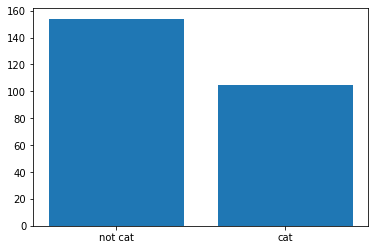

In [4]:
print('Information about classes:')

classes = np.unique(df.label)
description = np.array([(labels[c], np.sum(df.label == c)) for c in classes])

for desc in description:
    print('Class: {}, number of samples: {}'.format(desc[0], desc[1]))

plt.bar(description[:,0], description[:,1].astype(np.int))
plt.show()

## Preprocessing

After having a clear idea of the data, it is necesarry to perform some tasks that could help to our purpose such as dealing with the outliers, denoising, histogram matching.

In [ ]:
# To be implemented

## Classification using only raw pixels

For the project you have to test at least 4 different features, and their combinations. In order to evaluate which is the better with at least a confussion matrix, but others indicator could be useful. But you have to justify why you think the include features could be useful. Remember that a model in which you can include prior knowledge of the problem will be always a better model.

In order to make a fair comparison the sets (train, test and validation) should be the same.

Here it is an example of using al the image pixels as a features. What is the disadvantage of doing this? This is the baseline.

In [14]:
# Convert images as vector to create dataset
df_train = df[df.set == 'train']

features = [imread(os.path.join(data_path, filename)).flatten() for filename in df_train.image]
features = np.array(features)
y = df_train.label.values

In [15]:
seed = 23 # In is important to use a seed

# Split dataset
X_train, X_val, y_train, y_val = train_test_split(features, y, test_size=0.20, random_state=seed)

print('Training set shape: {}'.format(X_train.shape))
print('Test set shape: {}'.format(X_val.shape))

Training set shape: (167, 12288)
Test set shape: (42, 12288)
[0 0 0 0 1]


In [16]:
model = svm.SVC() # You can set the parameters
model.fit(X_train, y_train) # Fitting the model

dump(model, 'svm_model_pixels.joblib') # saving model
model = load('svm_model_pixels.joblib') # loading model

## Assesment of the model

Model accuracy in training set: 0.9221556886227545


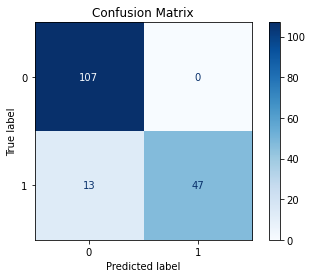

Model accuracy in test set: 0.42


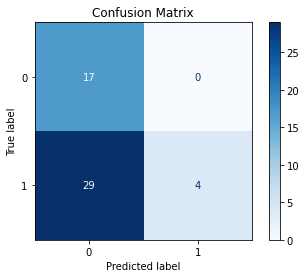

In [18]:
y_pred = model.predict(X_train) # Prediction on test set

accuracy_train = accuracy_score(y_train, y_pred)

print('Model accuracy in training set: {}'.format(accuracy_train))

np.set_printoptions(precision=2)
cm = plot_confusion_matrix(model, X_train, y_train,
                           display_labels=np.unique(y),
                           cmap=plt.cm.Blues, normalize=None)
cm.ax_.set_title('Confusion Matrix')
plt.show()

df_test = df[df.set == 'test']

X_test = [imread(os.path.join(data_path, filename)).flatten() for filename in df_test.image]
X_test = np.array(features_test)
y_test = df_test.label.values

y_pred = model.predict(X_test) # Prediction on test set

accuracy_test = accuracy_score(y_test, y_pred)
print('Model accuracy in test set: {}'.format(accuracy_test))

np.set_printoptions(precision=2)
cm = plot_confusion_matrix(model, X_test, y_test,
                           display_labels=np.unique(y),
                           cmap=plt.cm.Blues, normalize=None)
cm.ax_.set_title('Confusion Matrix')
plt.show()

### References

1. <span id="fn1">Zhang, Yu-Jin. "Image engineering." Handbook of Image Engineering. Springer, Singapore, 2021. 55-83.</span>